In [1]:
import pandas as pd
import numpy as np
from keras.layers import Dense, Input
from keras.models import Model

Using TensorFlow backend.


In [9]:
input_img = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='sigmoid')(encoded)
decoded = Dense(128, activation='sigmoid')(encoded)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

decoder_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]

decoder = Model(decoder_input, decoder_layer(decoder_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [10]:
from keras.datasets import mnist

In [11]:
(x_train,_), (x_test,_) = mnist.load_data()

In [12]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]));
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]));

In [16]:
autoencoder.fit(x_train,x_train, 
               epochs=100,
               batch_size=256,
               shuffle = True,
               validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 8s 127us/step - loss: 0.1133 - val_loss: 0.1114
Epoch 2/100
60000/60000 [==============================] - 7s 124us/step - loss: 0.1130 - val_loss: 0.1118
Epoch 3/100
60000/60000 [==============================] - 7s 114us/step - loss: 0.1126 - val_loss: 0.1104
Epoch 4/100
60000/60000 [==============================] - 7s 115us/step - loss: 0.1124 - val_loss: 0.1108
Epoch 5/100
60000/60000 [==============================] - 7s 114us/step - loss: 0.1119 - val_loss: 0.1104
Epoch 6/100
60000/60000 [==============================] - 7s 116us/step - loss: 0.1117 - val_loss: 0.1094
Epoch 7/100
60000/60000 [==============================] - 7s 117us/step - loss: 0.1114 - val_loss: 0.1099
Epoch 8/100
60000/60000 [==============================] - 7s 115us/step - loss: 0.1111 - val_loss: 0.1091
Epoch 9/100
60000/60000 [==============================] - 7s 117us/step - loss: 0.1108 - val_

60000/60000 [==============================] - 7s 113us/step - loss: 0.1009 - val_loss: 0.0996
Epoch 77/100
60000/60000 [==============================] - 7s 114us/step - loss: 0.1009 - val_loss: 0.0999
Epoch 78/100
60000/60000 [==============================] - 7s 112us/step - loss: 0.1009 - val_loss: 0.0999
Epoch 79/100
60000/60000 [==============================] - 7s 113us/step - loss: 0.1008 - val_loss: 0.0999
Epoch 80/100
60000/60000 [==============================] - 7s 113us/step - loss: 0.1006 - val_loss: 0.0993
Epoch 81/100
60000/60000 [==============================] - 7s 118us/step - loss: 0.1006 - val_loss: 0.0994
Epoch 82/100
60000/60000 [==============================] - 7s 114us/step - loss: 0.1006 - val_loss: 0.0990
Epoch 83/100
60000/60000 [==============================] - 9s 142us/step - loss: 0.1005 - val_loss: 0.0991
Epoch 84/100
60000/60000 [==============================] - 9s 150us/step - loss: 0.1004 - val_loss: 0.0991
Epoch 85/100
60000/60000 [===============

In [17]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

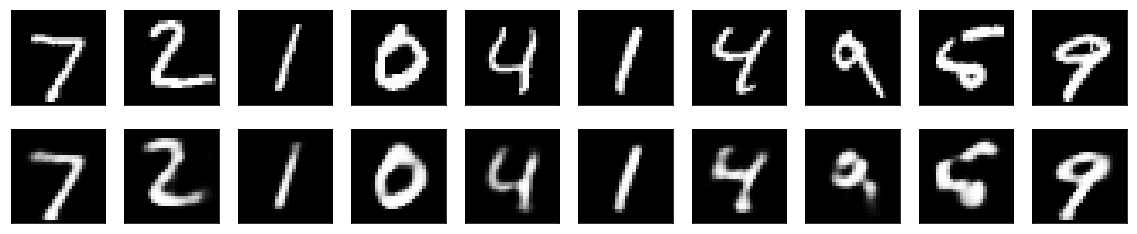

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    